In [ ]:
!pip install yfinance google-generativeai -q

/tmp/ipython-input-4081397608.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

🚀 Starting the financial analysis for TSLA...

--- Successfully fetched recent data for TSLA ---
Price            Close        High         Low        Open    Volume
Ticker            TSLA        TSLA        TSLA        TSLA      TSLA
Date                                                                
2025-08-04  309.260010  312.119995  303.000000  309.079987  78683900
2025-08-05  308.720001  312.450012  305.500000  308.950012  57961300
2025-08-06  319.910004  320.470001  306.929993  307.890015  78523600
2025-08-07  322.269989  322.399994  316.160004  319.790009  66658700
2025-08-08  329.649994  335.149994  320.980011  321.429993  91006400

--- Generating Price Trend Chart ---



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


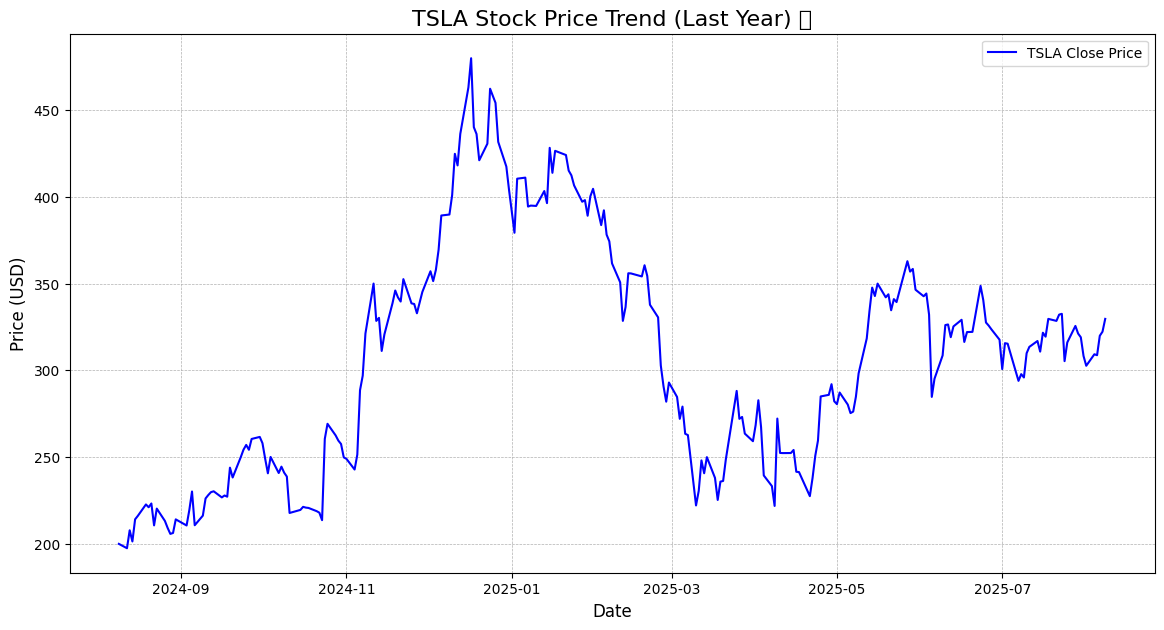


--- Contacting Gemini for Analysis... 💡 ---

--- Gemini's Report on TSLA ---
Over the past year, TSLA stock experienced significant volatility. While the stock price ultimately closed at $329.65, a substantial increase from its starting price of $200.00,  the journey wasn't linear.  The stock reached a high of $488.54, demonstrating considerable upward potential, but also dropped to a low of $194.67, highlighting significant downside risk.  Therefore, the overall trend shows a net positive movement, but the considerable price swings indicate a volatile stock with periods of both strong gains and substantial losses.



In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import google.generativeai as genai
from datetime import datetime, timedelta
from google.colab import userdata

ticker_symbol = 'TSLA'

print(f"🚀 Starting the financial analysis for {ticker_symbol}...")

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

try:
    stock_data = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
    if stock_data.empty:
        raise ValueError(f"No data found for ticker {ticker_symbol}. It may be an invalid ticker.")
    print(f"\n--- Successfully fetched recent data for {ticker_symbol} ---")
    print(stock_data.tail().to_string())
except Exception as e:
    print(f"Error fetching data: {e}")
    raise SystemExit

print("\n--- Generating Price Trend Chart ---")
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label=f'{ticker_symbol} Close Price', color='blue')
plt.title(f'{ticker_symbol} Stock Price Trend (Last Year) 📈', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

print("\n--- Contacting Gemini for Analysis... 💡 ---")
try:
    gemini_key = userdata.get('GEMINI_API_KEY')
    genai.configure(api_key=gemini_key)

    start_price = stock_data['Close'].iloc[0].item()
    end_price = stock_data['Close'].iloc[-1].item()
    high_price = stock_data['High'].max().item()
    low_price = stock_data['Low'].min().item()

    prompt = f"""
    Act as a financial analyst providing a simple summary for a retail investor.
    Analyze the stock trend for {ticker_symbol} based on the following data points from the last year:

    - Starting Price: ${start_price:.2f}
    - Final Price: ${end_price:.2f}
    - Highest Price: ${high_price:.2f}
    - Lowest Price: ${low_price:.2f}

    Based on the general price movement and these key data points, provide a brief, one-paragraph summary in plain English.
    Describe the overall trend (e.g., generally upward, downward, or volatile with no clear direction).
    IMPORTANT: This is for educational purposes only. Do not provide any financial advice or future price predictions.
    """

    model = genai.GenerativeModel('gemini-1.5-flash-latest')
    response = model.generate_content(prompt)

    print(f"\n--- Gemini's Report on {ticker_symbol} ---")
    print(response.text)

except userdata.SecretNotFoundError:
    print('🚨 Error: Secret "GEMINI_API_KEY" not found. Please follow the setup instructions to add your API key to Colab Secrets.')
except Exception as e:
    print(f"An error occurred during Gemini analysis: {e}")
